# Семинар 1. Повторяем матстат


In [ ]:
import numpy as np
import scipy as sp

from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

## Центральная предельная теорема

![Central theorem](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/2560px-IllustrationCentralTheorem.png)

<a href="https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0">Источник Википедия</a>

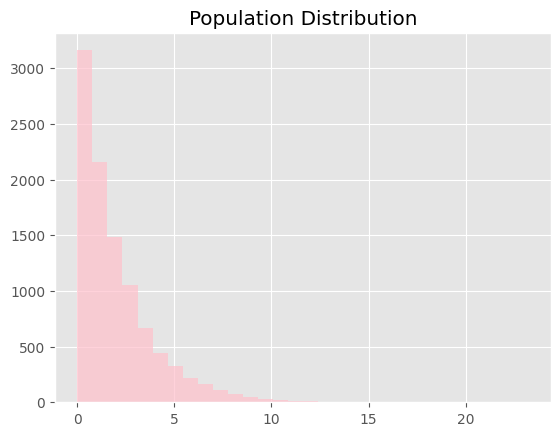

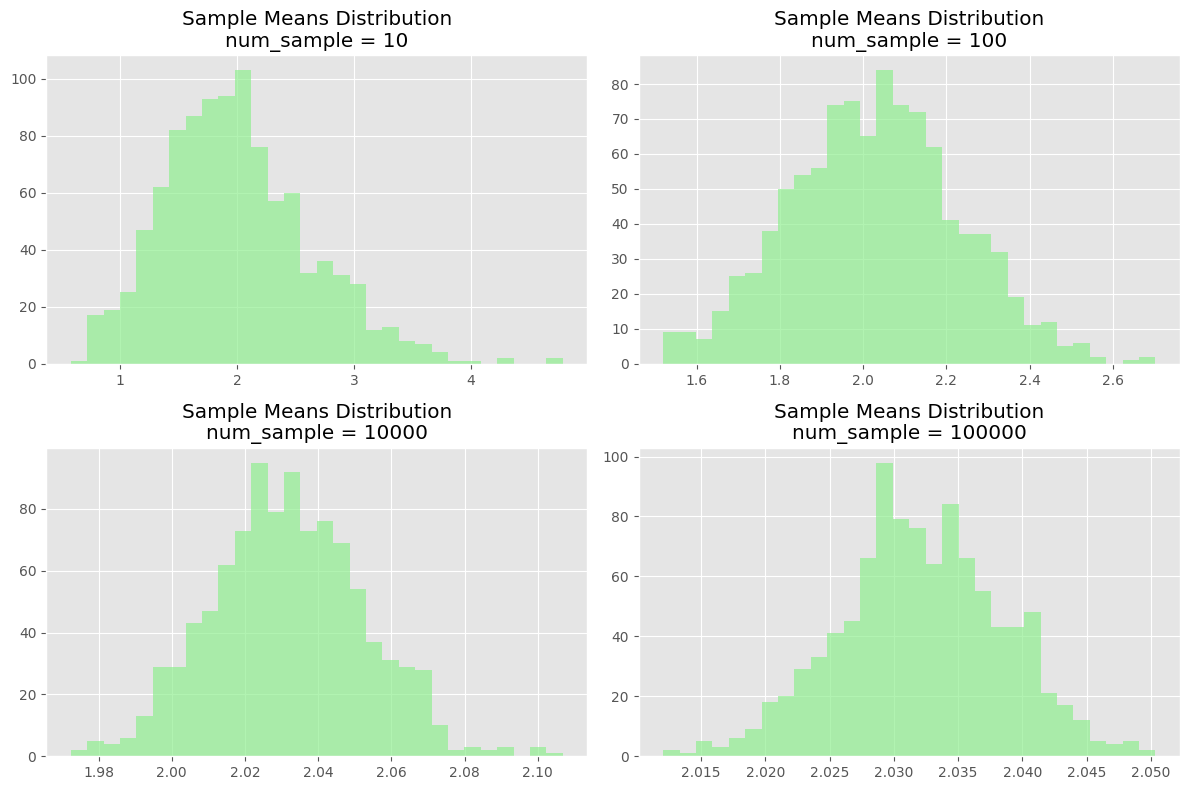

In [ ]:
# define a non-normal population distribution (exponential in this case)
population_dist = np.random.exponential(scale=2, size=10000)

# number of samples
num_samples = [10, 100, 10000, 100000]

plt.hist(population_dist, bins=30, color='pink', alpha=0.7)
plt.title('Population Distribution')

# generate sample means and plot distributions
plt.figure(figsize=(12, 8))

for i, sample in enumerate(num_samples):
    sample_means = np.array([
        np.mean(
            np.random.choice(population_dist, sample)
        )
        for _ in range(1000)
    ])

    plt.subplot(2, 2, i+1)
    plt.hist(sample_means, bins=30, color='lightgreen', alpha=0.7)
    plt.title(f'Sample Means Distribution\nnum_sample = {sample}')

plt.tight_layout()
plt.show()

## t-test

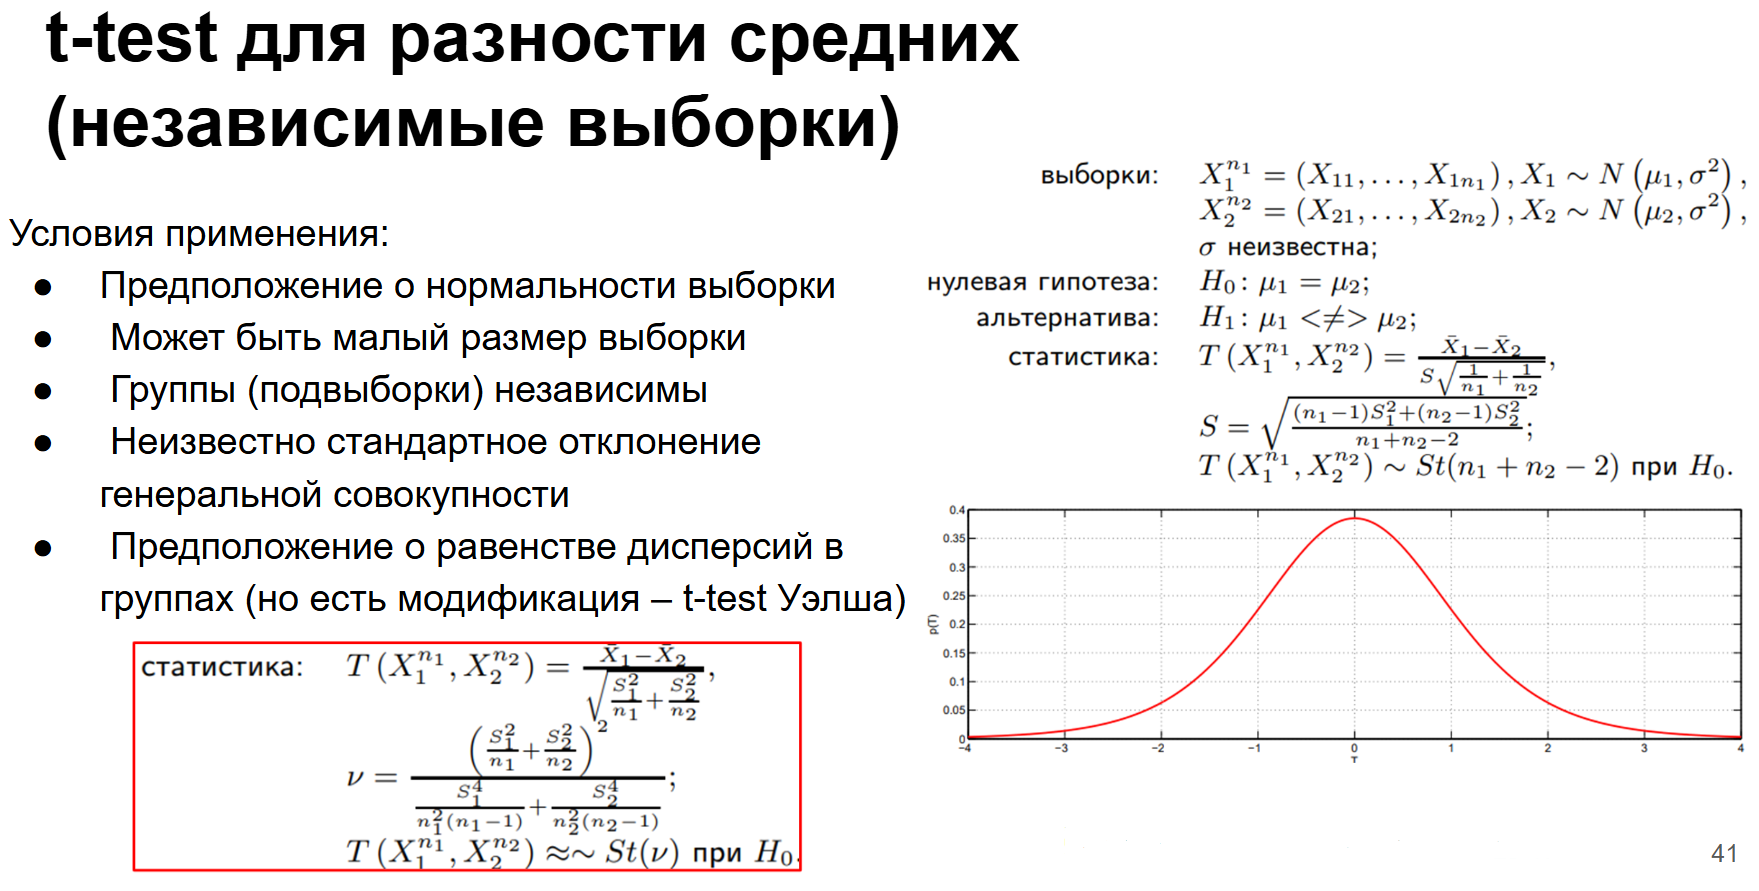

### Простой пример

In [ ]:
group_A = np.random.normal(25, 4, size=100)
group_B = np.random.normal(25, 4, size=100)

f"t-test (mean1 = mean2, n = 100) p_value: {sp.stats.ttest_ind(group_A, group_B).pvalue:.3f}"

't-test (mean1 = mean2, n = 100) p_value: 0.480'

<details>
  <summary>📝 Подсказка </summary>
    
Как принимаем решение?
    
Смотрим на значение p_value
    
- p_value > alpha 0.05 => не можем отвергнуть H0 о равенстве мат.ожиданий

- p_value < alpha 0.05 => принимаем H1 , отвергаем гипотезу H0 о равенстве мат.ожиданий
    
</details>

<details>
  <summary>📝 Подсказка </summary>
    
Random seed не зафиксирован - это значит, что при каждом перезапуске ячейки мы будем получать разные группы А и Б

 => получать разное значение p_value
    
(интуиция: это как проведение одного А/Б-теста, где мы принимаем решение только по результатам одного значения p_value)
    
</details>

### Оцениваем пару метрика + стат.тест по распределению p_value

Корректность критерия (significance) - `доля случаев, в которых на А/А тесте критерий находит различие там, где его нет`

- `А/А-тест = НЕТ различий в группах`

-  Для этого нам нужно прогнать много симуляций (идеально >= 1000) на исторических / смоделированных данных

$$significance = P(\text{reject }H_0 | H_0 \text{ is true})$$


### 1) Нормальное распределение + маленькая выборка

Корректность = 0.957


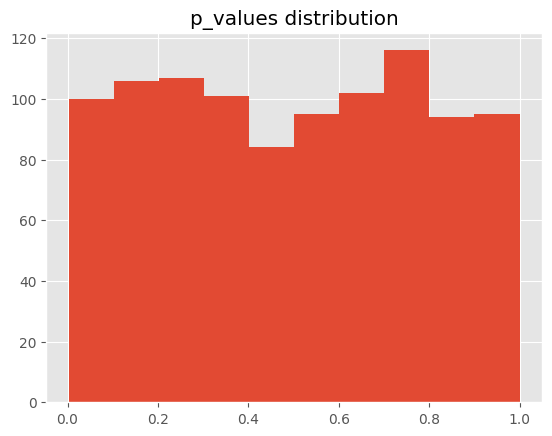

In [ ]:
p_values = []
iters = 1000

for _ in range(iters):
    group_A = np.random.normal(25, 4, size=100) # различий нет
    group_B = np.random.normal(25, 4, size=100) # различий нет
    p = sp.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)

print(f"Корректность = {1 - p_values[p_values < 0.05].shape[0] / p_values.shape[0]:.3f}")

plt.hist(p_values);
plt.title('p_values distribution');

<details>
  <summary>📝 Подсказка</summary>
    
Что хотим увидеть здесь?

- что корректность критерия < alpha 0.05
- что p_value распределен равномерно
                                   
Если эти два пункта выполняются для конкретной пары (метрика + критерий) => критерий применять можно
                                   
</details>

### 2) Нормальное распределение + большая выборка

Корректность = 0.949


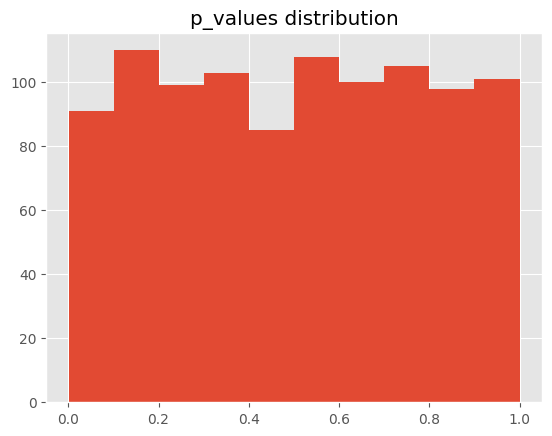

In [ ]:
p_values = []
iters = 1000

for _ in range(iters):
    group_A = np.random.normal(25, 4, size=10000)
    group_B = np.random.normal(25, 4, size=10000)
    p = sp.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)

print(f"Корректность = {1 - p_values[p_values < 0.05].shape[0] / p_values.shape[0]:.3f}")

plt.hist(p_values);
plt.title('p_values distribution');

В обоих случаях критерий + метрика применены корректно. Нормальное распределение - это безопасный вариант. А что, если взять другое распределение?

### Давайте теперь возьмем данные не из нормального распределения

t-test реализация scipy, строго говоря, не требует нормальности выборки. Считаем, что при большом объеме выборки средние по ЦПТ распределены нормально и этого достаточно

### 3) Не нормальное распределение + маленькая выборка

Корректность = 0.957


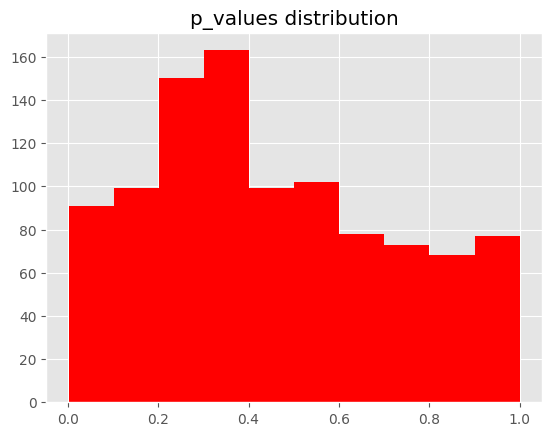

In [ ]:
# lognormal
p_values = []
iters = 1000

for _ in range(iters):
    group_A = np.random.lognormal(10, 2, 100)
    group_B = np.random.lognormal(10, 2, 100)
    p = sp.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)

print(f"Корректность = {1 - p_values[p_values < 0.05].shape[0] / p_values.shape[0]:.3f}")

plt.hist(p_values, color='red');
plt.title('p_values distribution');

### 4) Не нормальное распределение + выборка чуть больше

Корректность = 0.962


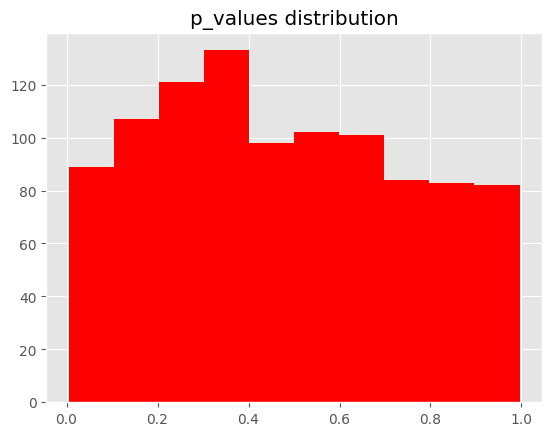

In [ ]:
# lognormal
p_values = []
iters = 1000

for _ in range(iters):
    group_A = np.random.lognormal(10, 2, 1000)
    group_B = np.random.lognormal(10, 2, 1000)
    p = sp.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)

print(f"Корректность = {1 - p_values[p_values < 0.05].shape[0] / p_values.shape[0]:.3f}")

plt.hist(p_values, color='red');
plt.title('p_values distribution');

### 5) Не нормальное распределение + выборка еще больше

Корректность = 0.951


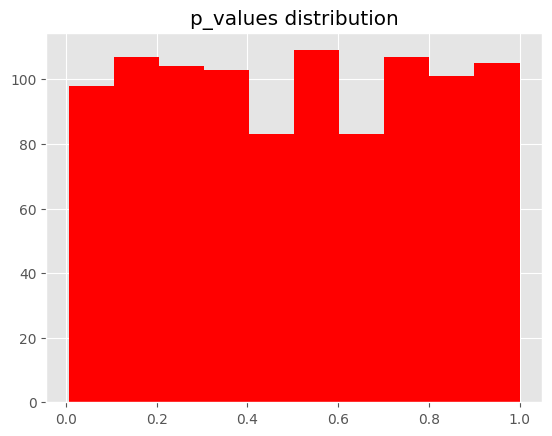

In [ ]:
# lognormal
p_values = []
iters = 1000

for _ in range(iters):
    group_A = np.random.lognormal(10, 2, 10000)
    group_B = np.random.lognormal(10, 2, 10000)
    p = sp.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)

print(f"Корректность = {1 - p_values[p_values < 0.05].shape[0] / p_values.shape[0]:.3f}")

plt.hist(p_values, color='red');
plt.title('p_values distribution');

### Сделаем выборки разными c разными дисперсиями

Корректность = 1.000


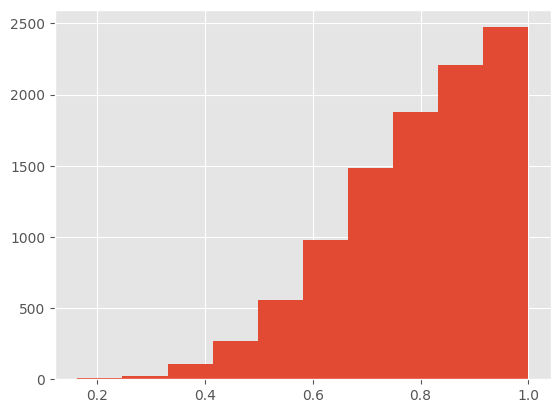

In [ ]:
p_values = []
iters = 1000

for _ in range(10000):
    group_A = np.random.normal(25, 1, size=100)
    group_B = np.random.normal(25, 10, size=1000)
    p = sp.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)

p_values = np.array(p_values)
print(f"Корректность = {1 - p_values[p_values < 0.05].shape[0] / p_values.shape[0]:.3f}")

plt.hist(p_values);

### Странно выглядящая гистограмма намекает нам на некорретное использование пары (метрика + критерий)


<details>
  <summary>📝 Подсказка</summary>
    
    
t-test предполагает по дефолту равенство дисперсий! Если дисперсии не равны, то переходим на t-test Welsh через использование параметра equal_var=False
                                   
</details>

Корректность = 0.951


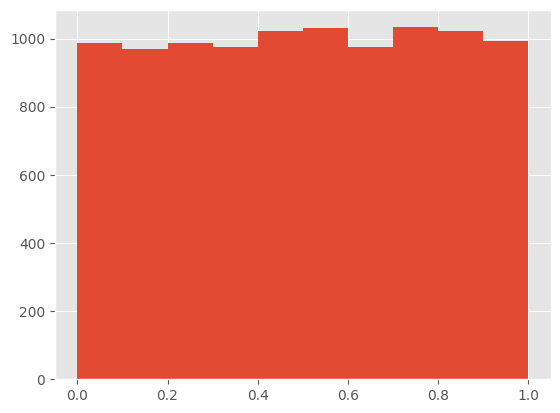

In [ ]:
p_values = []
iters = 1000

for _ in range(10000):
    group_A = np.random.normal(25, 1, size=1000)
    group_B = np.random.normal(25, 10, size=1000)
    p = sp.stats.ttest_ind(group_A, group_B, equal_var=False).pvalue  # теперь работает
    p_values.append(p)
p_values = np.array(p_values)

print(f"Корректность = {1 - p_values[p_values < 0.05].shape[0] / p_values.shape[0]:.3f}")

plt.hist(p_values);

## Распределение p_value: почему распределение должно быть равномерным при справедливости $Н_0$

### Изменим порог отвержения нулевой гипотезы $\alpha$

In [ ]:
p_values = []
iters = 10000
alpha = 0.1

for _ in range(iters):
    group_A = np.random.normal(25, 5, size=10000)
    group_B = np.random.normal(25, 5, size=10000)
    p = sp.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)

print(f"Корректность = {1 - p_values[p_values < 0.05].shape[0] / p_values.shape[0]:.3f}")

Корректность = 0.951


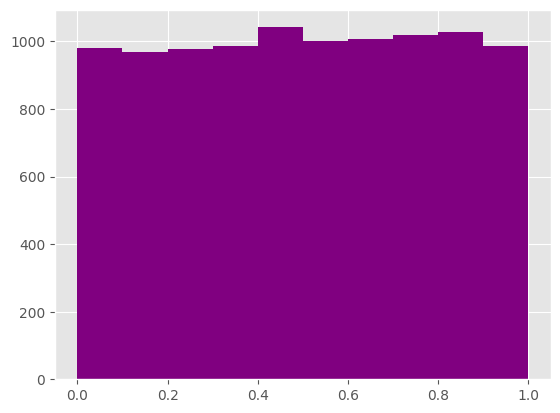

In [ ]:
plt.hist(p_values, color='purple');

### Построим график доли когда [p_value < порога] от значений порога

In [ ]:
alpha_list = [i * 0.1 for i in range(0,10)]
false_posititve_list = []
iters = 1000

for alpha in alpha_list:
    p_values = []
    for _ in range(iters):
        group_A = np.random.normal(25, 5, size=1000)
        group_B = np.random.normal(25, 5, size=1000)
        p = sp.stats.ttest_ind(group_A, group_B).pvalue
        p_values.append(p)
    p_values = np.array(p_values)
    false_posititve_list.append(p_values[p_values < alpha].shape[0] / p_values.shape[0])

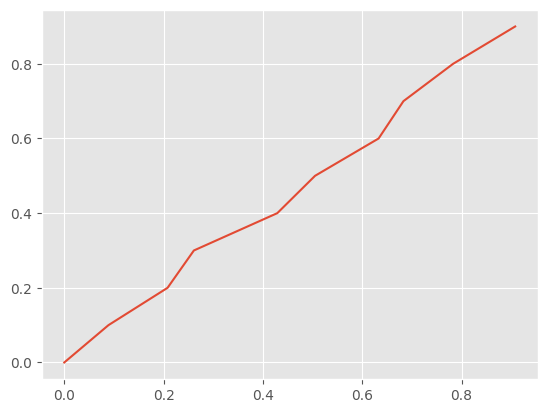

In [ ]:
plt.plot(false_posititve_list, alpha_list);

## Критерий Колмогорова-Смирнова

Критерий Колмогорова-Смирнова (KS-тест) - это статистический тест, который используется для определения того, насколько выборочная функция распределения соответствует теоретической функции распределения. Он используется для проверки гипотезы о том, что две выборки взяты из одного и того же распределения.

### Проверим равномерность распределения с помощью критерия Колмогорова-Смирнова

Корректность = 0.894


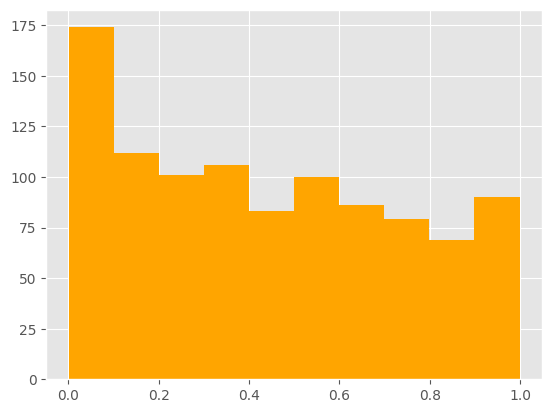

In [ ]:
p_values = []
iters = 1000
for _ in range(iters):
    group_A = np.random.normal(23, 11, size=100)
    group_B = np.random.normal(23, 1, size=100)
    p = sp.stats.mannwhitneyu(group_A, group_B, alternative='two-sided').pvalue
    p_values.append(p)
p_values = np.array(p_values)

print(f"Корректность = {1 - p_values[p_values < 0.05].shape[0] / p_values.shape[0]:.3f}")
plt.hist(p_values, color='orange');

In [ ]:
print(f"Критерий Колмогорова-Смирнова для равномерного распред: "
    f"p_value = {sp.stats.kstest(p_values, sp.stats.uniform(loc=0.0, scale=1.0).cdf).pvalue:.3f}")

Критерий Колмогорова-Смирнова для равномерного распред: p_value = 0.000


Корректность = 0.952


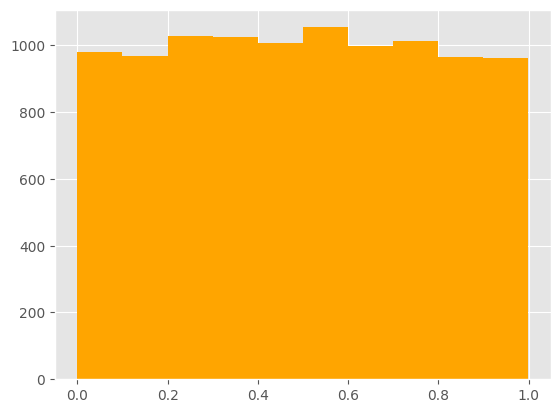

In [ ]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.normal(10, 3, 1000)
    group_B = np.random.normal(10, 3, 1000)
    p = sp.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)

print(f"Корректность = {1 - p_values[p_values < 0.05].shape[0] / p_values.shape[0]:.3f}")
plt.hist(p_values, color='orange');

In [ ]:
print(f"Критерий Колмогорова-Смирнова для равномерного распред: "
    f"p_value = {sp.stats.kstest(p_values, sp.stats.uniform(loc=0.0, scale=1.0).cdf).pvalue:.3f}")

Критерий Колмогорова-Смирнова для равномерного распред: p_value = 0.532


<details>
  <summary>📝 Подсказка </summary>
    
Как принимаем решение для анализа распределения p_value на равномерность?
    
Смотрим на значение p_value, но ждем результата "наоборот, больше 0.05"
    
- p_value > alpha 0.05 => не можем отвергнуть H0 о соответствии равномерному распределению

- p_value < alpha 0.05 => принимаем H1 о том что распределение НЕ равномерно
    
</details>

## Мощность - вероятность того, что критерий найдет различие в случае, когда оно есть

$$power = P(\text{reject }H_0 | H_1 \text{ is true})$$

1) Искусственно добавляем эффект в одну из групп
2) Вычисляем через симуляции процент раз, когда мы нашли эффект, когда он реально есть
3) Хотим видеть мощность >= 0.8 (80%)

Увеличение мощности критерия ведет к уменьшению вероятности ошибки второго рода

### Делаем средние разными

In [ ]:
p_values = []
iters = 10000

for _ in range(iters):
    group_A = np.random.normal(23, 11, size=100)
    group_B = np.random.normal(25, 10, size=100)
    p = sp.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)

print(f"Мощность = {p_values[p_values < 0.05].shape[0] / p_values.shape[0]}")

Мощность = 0.2724


### Увеличим разницу

In [ ]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.normal(21, 10, size=100)
    group_B = np.random.normal(25, 10, size=100)
    p = sp.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)

print(f"Мощность = {p_values[p_values < 0.05].shape[0] / p_values.shape[0]}")

Мощность = 0.8052


### Увеличим выборку

In [ ]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.normal(23, 10, size=1000)
    group_B = np.random.normal(25, 10, size=1000)
    p = sp.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)
p_values = np.array(p_values)

print(f"Мощность = {p_values[p_values < 0.05].shape[0] / p_values.shape[0]}")

Мощность = 0.995


## Критерий Манна-Уитни (непараметрический)

0.035


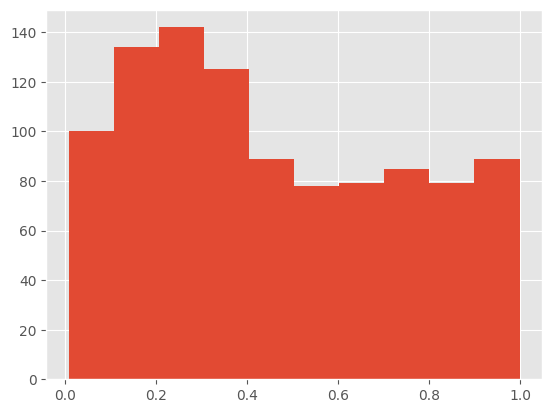

In [ ]:
p_values = []
iters = 1000

for _ in range(iters):
    group_A = np.random.lognormal(10, 2, 100)
    group_B = np.random.lognormal(10, 2, 100)
    p = sp.stats.ttest_ind(group_A, group_B).pvalue
    p_values.append(p)

p_values = np.array(p_values)
print(p_values[p_values < 0.05].shape[0] / p_values.shape[0])

plt.hist(p_values);

Критерий применять не корректно, распределение p-value распределенно не равномерно. Попробуем выбрать непараметрический критерий

Корректность = 0.0442


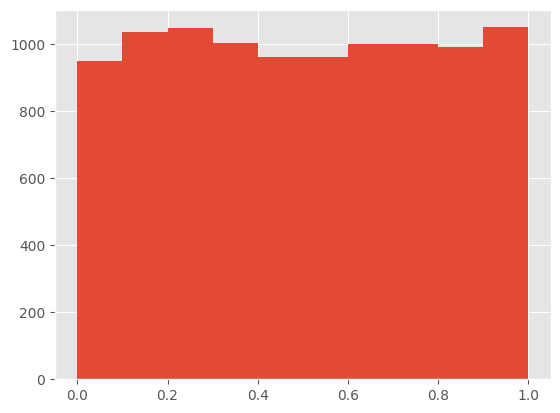

In [ ]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.lognormal(10, 2, 100)
    group_B = np.random.lognormal(10, 2, 100)

    p = sp.stats.mannwhitneyu(group_A, group_B, alternative='two-sided').pvalue

    p_values.append(p)
p_values = np.array(p_values)
print(f"Корректность = {p_values[p_values < 0.05].shape[0] / p_values.shape[0]}")

plt.hist(p_values);

### Оценим мощность

In [ ]:
p_values = []
iters = 10000
for _ in range(iters):
    group_A = np.random.lognormal(9, 2, 100)
    group_B = np.random.lognormal(10, 2, 100)
    p = sp.stats.mannwhitneyu(group_A, group_B, alternative='two-sided').pvalue
    p_values.append(p)
p_values = np.array(p_values)

print(f"Мощность = {p_values[p_values < 0.05].shape[0] / p_values.shape[0]}")

Мощность = 0.9311


### Непараметрический критерий сработал хорошо!

### Когда критерий Манна-Уитни будет плох?

Корректность = 0.092


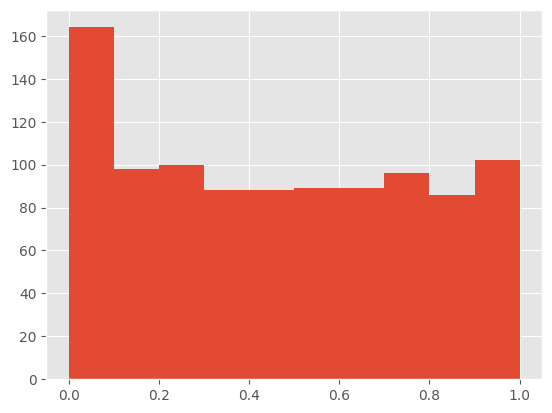

In [ ]:
p_values = []
iters = 1000
for _ in range(iters):
    group_A = np.random.normal(23, 11, size=100)
    group_B = np.random.normal(23, 1, size=100)
    p = sp.stats.mannwhitneyu(group_A, group_B, alternative='two-sided').pvalue
    p_values.append(p)
p_values = np.array(p_values)

print(f"Корректность = {p_values[p_values < 0.05].shape[0] / p_values.shape[0]}")
plt.hist(p_values);

### Почему распределение такое?

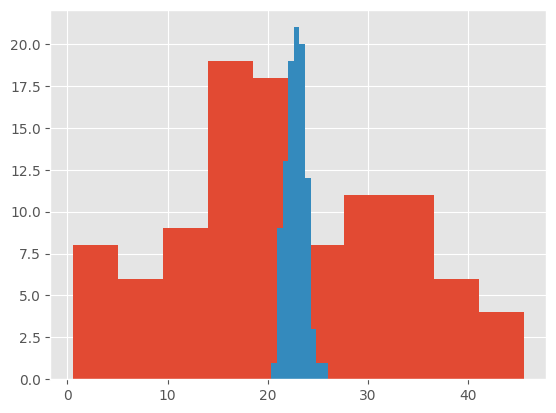

In [ ]:
plt.hist(group_A);
plt.hist(group_B);

### Теперь сделаем выборки 'похожими' по распределению

Корректность = 0.0486


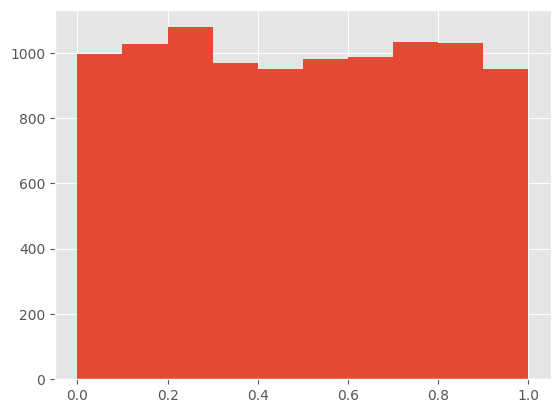

In [ ]:
p_values = []
iters = 10000

for _ in range(iters):
    group_A = np.random.normal(23, 11, size=100)
    group_B = np.random.normal(23, 11, size=100)
    p = sp.stats.mannwhitneyu(group_A, group_B, alternative='two-sided').pvalue
    p_values.append(p)
p_values = np.array(p_values)

print(f"Корректность = {p_values[p_values < 0.05].shape[0] / p_values.shape[0]}")
plt.hist(p_values);

## Q-Q plot

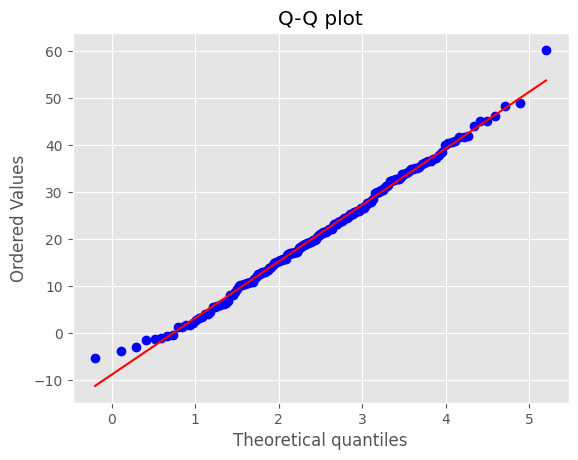

In [ ]:
group_B = np.random.normal(23, 11, size=200)

fig = plt.figure()
ax = fig.add_subplot(111)
res = sp.stats.probplot(group_B, dist='norm', sparams=(2.5,), plot=ax)
ax.set_title("Q-Q plot");

Text(0.5, 1.0, 'Q-Q plot')

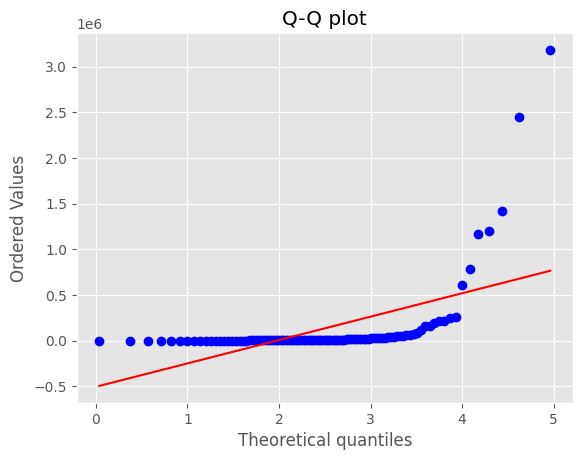

In [ ]:
group_B = np.random.lognormal(9,3,100)

fig = plt.figure()
ax = fig.add_subplot(111)
res = sp.stats.probplot(group_B, dist='norm', sparams=(2.5,), plot=ax)
ax.set_title("Q-Q plot")

Text(0.5, 1.0, 'Q-Q plot')

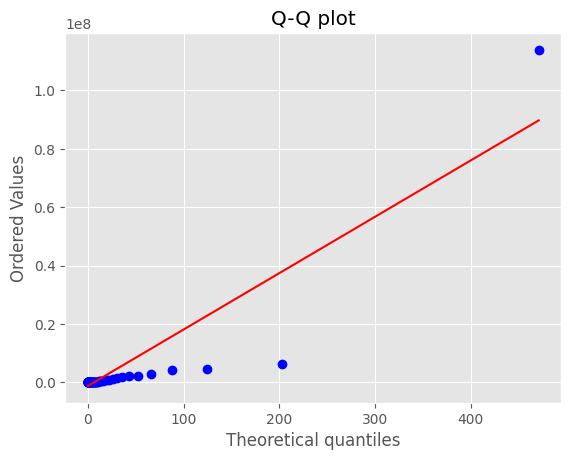

In [ ]:
group_B = np.random.lognormal(9,3,100)

fig = plt.figure()
ax = fig.add_subplot(111)
res = sp.stats.probplot(group_B, dist='lognorm', sparams=(2.5,), plot=ax)
ax.set_title("Q-Q plot")

Text(0.5, 1.0, 'Q-Q plot')

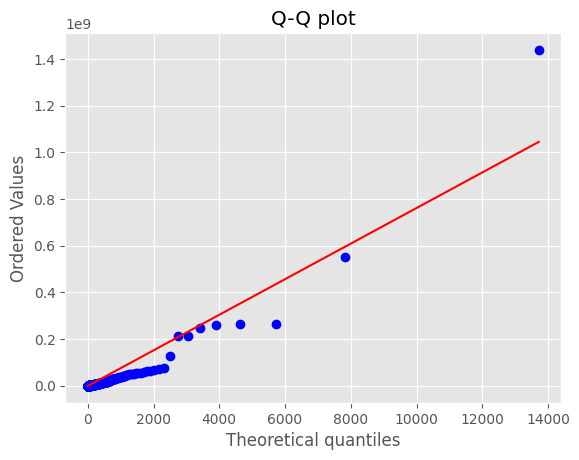

In [ ]:
group_B = np.random.lognormal(9,3,10000)

fig = plt.figure()
ax = fig.add_subplot(111)
res = sp.stats.probplot(group_B, dist='lognorm', sparams=(2.5,), plot=ax)
ax.set_title("Q-Q plot")

# z-test для долей

## 1) Выбираем исходную бинарную метрику

Примеры

- Зашел / не зашел на страницу
- кликнул / не кликнул на объявление

Это будет вектор из 0 и 1

## 2) Превращаем бинарную метрику в конверсию

$CTR = \frac{clicks}{views}$

Доля кликнувших = Количество кликов / Количество просмотров

## 3) Так как у нас две группы, то получаем на выходе 2 конверсии

Например, CTR в группе А и CTR в группе B

## 4) Отправляем эти 2 конверсии в z-test

## 5) Получаем результат теста

Это очень простой и понятный дизайн A/B теста, который всегда можно использовать как план Б.

Его минус в том, что оптимизируемся на клики - соответственно появляется опасность оптимизации кликбейта

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

iters = 1000
group_A = np.random.binomial(1, 0.1, size=iters)
group_B = np.random.binomial(1, 0.1, size=iters)

count = np.array([np.sum(group_A), np.sum(group_B)])
nobs = np.array([iters, iters])

z, p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(f' z-score = {z:.3f} \n p-value = {p:.3f}')

 z-score = -1.126 
 p-value = 0.260


In [ ]:
group_A[:100]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
count

array([ 91, 106])

In [ ]:
nobs

array([1000, 1000])

Корректность = 0.0438


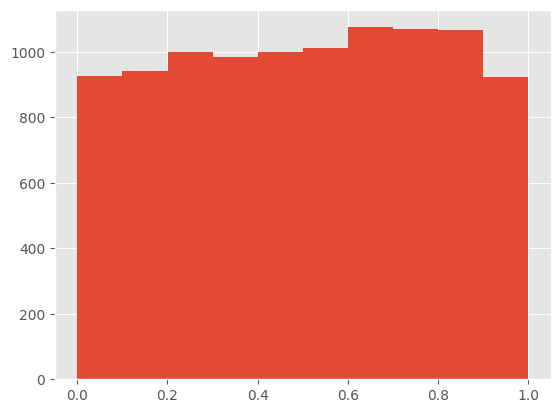

In [ ]:
p_values = []
iters = 10000
size = 5000
for _ in range(iters):
    group_A = np.random.binomial(1, 0.1, size=size)
    group_B = np.random.binomial(1, 0.1, size=size)
    count = np.array([np.sum(group_A), np.sum(group_B)])
    nobs = np.array([iters, iters])
    z, p = proportions_ztest(count, nobs, alternative='two-sided')
    p_values.append(p)
p_values = np.array(p_values)

print(f"Корректность = {p_values[p_values < 0.05].shape[0] / p_values.shape[0]}")
plt.hist(p_values);

## Мощность

In [ ]:
p_values = []
iters = 10000
size = 5000
for _ in range(iters):
    group_A = np.random.binomial(1, 0.09, size =size)
    group_B = np.random.binomial(1, 0.1, size =size)
    count = np.array([np.sum(group_A), np.sum(group_B)])
    nobs = np.array([iters, iters])
    z, p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
    p_values.append(p)
p_values = np.array(p_values)

print(f"Мощность = {p_values[p_values < 0.05].shape[0] / p_values.shape[0]}")

Мощность = 0.3776


## Увеличим разницу

In [ ]:
p_values = []
iters = 10000
size = 5000
for _ in range(iters):
    group_A = np.random.binomial(1, 0.08, size=size)
    group_B = np.random.binomial(1, 0.1, size=size)
    count = np.array([np.sum(group_A), np.sum(group_B)])
    nobs = np.array([iters, iters])
    z, p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
    p_values.append(p)
p_values = np.array(p_values)

print(f"Мощность = {p_values[p_values < 0.05].shape[0] / p_values.shape[0]}")

Мощность = 0.9352


# Bootstrap

![Bootstrap](https://github.com/Yorko/mlcourse.ai/blob/main/img/bootstrap.jpg?raw=true)

Источник https://habr.com/ru/companies/ods/articles/324402/

- нас не волнует исходное распределение вектора метрики

- вместо стат.критерия оцениваем гипотезу методом доверительных интервалов

- с такой постановкой задачи = получаем достаточно мощный критерий


## `Как работает (теория)`

1.   Для каждой группы A и B генерируются M раз псевдовыборки из исходной выборки как выборки с возвращением
2.   На каждой паре псевдовыборок считается некоторая статистика, которую мы оцениваем
3.   Дальше строим доверительный интервал для m накопленных статистик

## `Как реализуем на практике`

### Реализуем цикл (рекомендация - повторение не менее 1000 раз), на каждом шаге которого:

- создаем выборку с возвращением

- считаем ее статистику (обычно mean)

- строим доверительный интервал для вектора дельт mean1 - mean2

- смотрим, вошел ли 0 в этот интервал

- если вошел - различий нет, если не вошел - различия есть

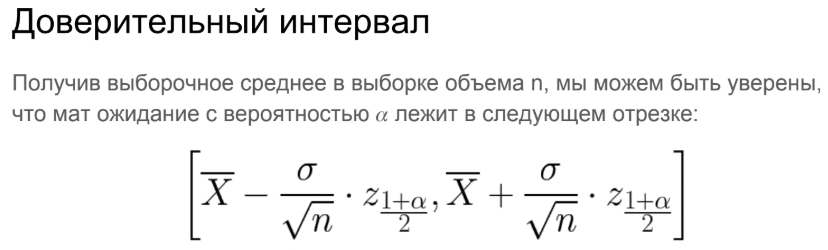

In [ ]:
# define the statistic you're interested in (e.g., mean)
def statistic(data):
    return np.mean(data)


def get_bootstrap(group_A, group_B, iters=100, alpha=0.05):

    bootstrap_statistics = []

    # Generate bootstrap samples
    for _ in range(iters):

        bootstrap_sample_A = np.random.choice(group_A, len(group_A), replace=True)
        bootstrap_sample_B = np.random.choice(group_B, len(group_B), replace=True)

        statistic_A = statistic(bootstrap_sample_A)
        statistic_B = statistic(bootstrap_sample_B)

        bootstrap_statistics.append(statistic_B - statistic_A)

    # Compute the confidence interval (e.g., 95% CI)
    confidence_interval = np.percentile(bootstrap_statistics, [100 * alpha / 2., 100 * (1 - alpha / 2.)])

    return bootstrap_statistics, confidence_interval


In [ ]:
stats, (left_side, right_side) = get_bootstrap(group_A, group_B)

In [ ]:
right_side

0.029514999999999986

In [ ]:
left_side

0.007295000000000001

In [ ]:
# посчитаем значения p_value по определению p-value = P(TS | H_0 is true)
# передадим в get_p_value разницы средних от бутстрапа

def get_p_value(dist):
    dist = np.array(dist)
    # calculate the proportion of values greater than 0
    x = (dist > 0).mean()
    # calculate the two-tailed p-value
    pvalue = min(x, 1 - x) * 2
    return pvalue


### Получаем одну итерацию теста, можем сохранить информацию о принятии H_1 для подсчета корректности / мощности

In [ ]:
significance = []

significance.append(not left_side <= 0 <= right_side)

In [ ]:
significance

[True]

### Далее прогоняем бустрап на симуляциях и также как ранее анализируем корректность и мощность

### Корректность

In [ ]:
stats_list = []
significance = []

stat_iters = 1000

for _ in tqdm(range(stat_iters)):
    groupA_gamma = np.random.gamma(shape=2, scale=1, size=500)
    groupB_gamma = np.random.gamma(shape=2, scale=1, size=500)

    stats, (left_side, right_side) = get_bootstrap(groupA_gamma, groupB_gamma, iters=1000)

    significance.append(not left_side <= 0 <= right_side)
    stats_list.append(stats)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
f"Корректность бустрэпа = {np.mean(significance)}"

'Корректность бустрэпа = 0.052'

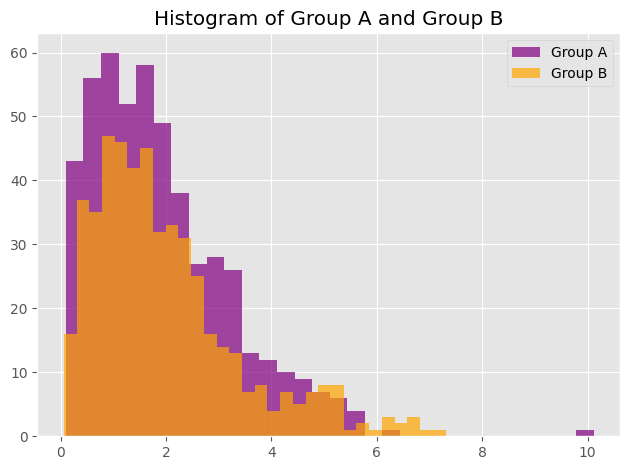

In [ ]:
plt.hist(groupA_gamma, bins=30, color='purple', alpha=0.7, label='Group A')
plt.hist(groupB_gamma, bins=30, color='orange', alpha=0.7, label='Group B')
plt.title('Histogram of Group A and Group B')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
p_values = [get_p_value(stat) for stat in stats_list]

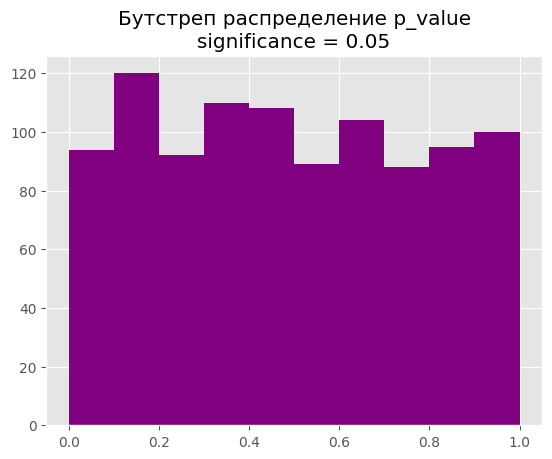

In [ ]:
plt.hist(p_values, bins=10, color='purple');
plt.title(f"Бутстреп распределение p_value\nsignificance = {np.round(np.mean(significance), 2)}");

### Мощность

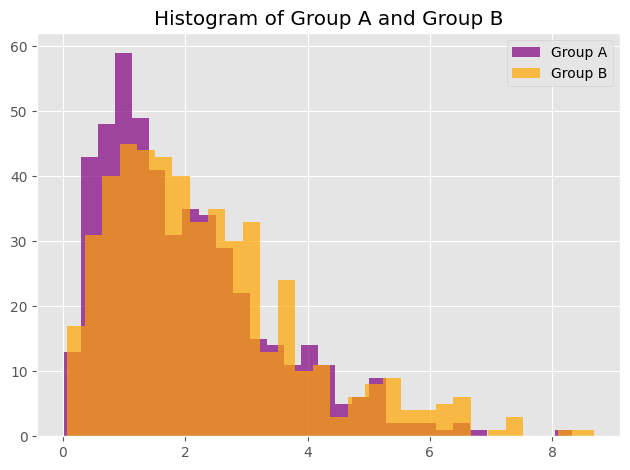

In [ ]:
groupA_gamma = np.random.gamma(shape=2, scale=1, size=500)
groupB_gamma = np.random.gamma(shape=2, scale=1.2, size=500)  # сдвигаем группу Б


plt.hist(groupA_gamma, bins=30, color='purple', alpha=0.7, label='Group A')
plt.hist(groupB_gamma, bins=30, color='orange', alpha=0.7, label='Group B')
plt.title('Histogram of Group A and Group B')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
stats_list = []
power = []

stat_iters = 1000

for _ in tqdm(range(stat_iters)):
    groupA_gamma = np.random.gamma(shape=2, scale=1, size=500)
    groupB_gamma = np.random.gamma(shape=2, scale=1.2, size=500) # сдвигаем группу Б

    stats, (left_side, right_side) = get_bootstrap(groupA_gamma, groupB_gamma, iters=1000)

    power.append(not left_side <= 0 <= right_side)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
f"Мощность бустрэпа = {np.mean(power)}"

'Мощность бустрэпа = 0.977'